In [21]:
from __future__ import print_function

import keras
import matplotlib.pyplot as plt
import numpy as np
import random

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import plot_model

In [24]:
batch_size = 128
num_classes = 10
epochs = 20
img_size = 28
num_pixels = 784
num_train = 60000
num_test = 10000

In [5]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train = x_train.reshape(num_train, num_pixels)
x_test = x_test.reshape(num_test, num_pixels)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
print(y_train)

[5 0 4 ... 5 6 8]


In [9]:
print(y_train[0])

5


In [10]:
print(len(y_train))

60000


In [11]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# Build model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
# Summary of model 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Define the loss function
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [16]:
# Run training
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2458 - acc: 0.9239 - val_loss: 0.1023 - val_acc: 0.9682
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1028 - acc: 0.9689 - val_loss: 0.1032 - val_acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0747 - acc: 0.9777 - val_loss: 0.0720 - val_acc: 0.9792
Epoch 4/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0613 - acc: 0.9809 - val_loss: 0.0756 - val_acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0497 - acc: 0.9851 - val_loss: 0.0801 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0445 - acc: 0.9870 - val_loss: 0.0693 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0397 - acc: 0.9880 - val_loss: 0.0767 - val_acc

In [17]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

In [18]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1072417572118055
Test accuracy: 0.9841


In [22]:
def predict_and_display(x_test, num_samples=10):
    rand_indices = random.sample(range(x_test.shape[0]), num_samples)
    for index in rand_indices:
        plt.imshow(x_test[index].reshape(img_size, img_size))
        plt.show()
        flat_img = x_test[index].reshape(1, num_pixels)
        predicted = np.argmax(model.predict(flat_img))
        print("PREDICTED LABEL: " + str(predicted))

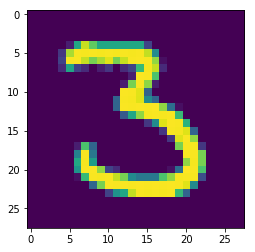

PREDICTED LABEL: 3


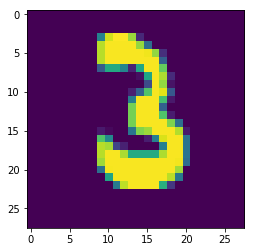

PREDICTED LABEL: 3


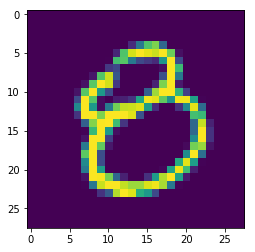

PREDICTED LABEL: 0


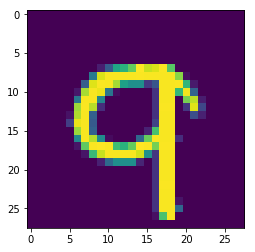

PREDICTED LABEL: 9


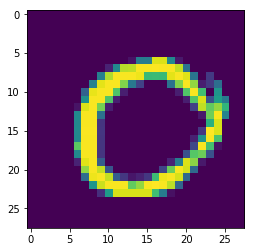

PREDICTED LABEL: 0


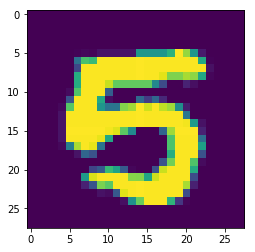

PREDICTED LABEL: 5


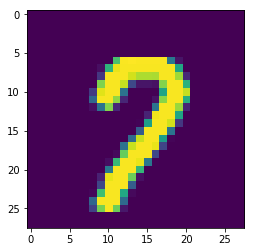

PREDICTED LABEL: 7


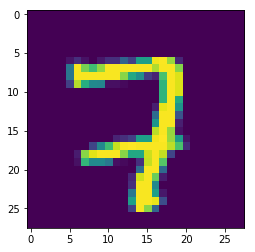

PREDICTED LABEL: 7


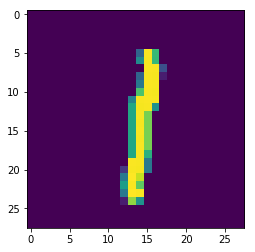

PREDICTED LABEL: 1


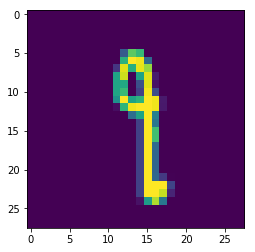

PREDICTED LABEL: 9


In [23]:
predict_and_display(x_test)